# Part I - (Ford Go-Bike Trip Data)
## by (Fidelis Leonard Chidubem)

## Introduction
> The GO-bike dataset includes information about individuals in a bike sharing system covering the greater San Francisco Bay area in 2019.  

> It maintains a record of users start and end locations and coordinates, as well as their trip duration, user registeration type, gender, etc. This analysis largely aims to determine how much effect the collected data has on user behaviors.   
.
.
.

# Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [5]:
# Load dataset using pandas

gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [6]:
# The dataset

gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Assessing Process

> Here, I'll perform some programatic and visual assessment to the dataset. the results of this assessment will be recorded thereafter. m

In [13]:
# To get an ideo of the records

gobike.shape

(183412, 16)

In [14]:
# Let's see the data types

gobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [15]:
# It's metadata

gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [16]:
# How much null values?

gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Do some stations with missing station IDs have recorded station names?

In [17]:
# I'll filter the list, first with the start stations

gobike[(gobike.start_station_id.isna() & gobike.start_station_name.notna())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [18]:
# How about end stations? 

gobike[(gobike.end_station_id.isna() & gobike.end_station_name.notna())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


None.
.

Do the null records in the start stations match the end stations?

In [19]:
gobike[(gobike.end_station_id.isna() & gobike.start_station_id.notna())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Yes, they do. Drop.

.

Like the station records, do the null data in the member gender columns match those in the member birth year?

In [20]:
gobike[gobike.member_gender.isna() & gobike.member_birth_year.notna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


Fine. Drop. 

In [21]:
#To have a close look at the distribution of  the trip duration coluumn

gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The minimum trip duration recorded is 61 seconds. Let's have a closer look. 

In [22]:
gobike[gobike.duration_sec == 61]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
18578,61,2019-02-26 18:23:44.2830,2019-02-26 18:24:45.5230,368.0,Myrtle St at Polk St,37.785434,-122.419622,368.0,Myrtle St at Polk St,37.785434,-122.419622,5333,Subscriber,1989.0,Female,No
19581,61,2019-02-26 16:40:53.1210,2019-02-26 16:41:54.4510,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5306,Subscriber,1987.0,Female,No
27017,61,2019-02-25 10:31:18.4150,2019-02-25 10:32:19.7480,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5921,Subscriber,1972.0,Male,Yes
44301,61,2019-02-22 15:09:57.0480,2019-02-22 15:10:58.7420,310.0,San Fernando St at 4th St,37.335885,-121.885660,280.0,San Fernando St at 7th St,37.337122,-121.883215,6347,Subscriber,1989.0,Male,Yes
44787,61,2019-02-22 13:56:21.9760,2019-02-22 13:57:23.4650,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,81.0,Berry St at 4th St,37.775880,-122.393170,6150,Subscriber,1931.0,Male,No
51120,61,2019-02-21 18:27:34.9930,2019-02-21 18:28:36.6300,113.0,Franklin Square,37.764555,-122.410345,100.0,Bryant St at 15th St,37.767100,-122.410662,6515,Subscriber,1984.0,Male,No
58992,61,2019-02-20 21:44:00.1540,2019-02-20 21:45:01.2350,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Church St at Duboce Ave,37.770083,-122.429156,4351,Subscriber,1994.0,Male,No
64088,61,2019-02-20 13:08:18.2850,2019-02-20 13:09:19.4330,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,2090,Subscriber,1931.0,Male,No
80047,61,2019-02-18 16:31:12.8960,2019-02-18 16:32:14.5880,89.0,Division St at Potrero Ave,37.769218,-122.407646,101.0,15th St at Potrero Ave,37.767079,-122.407359,6195,Subscriber,1931.0,Male,No
82564,61,2019-02-18 09:53:31.3990,2019-02-18 09:54:33.1620,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,3054,Subscriber,1990.0,Male,No


Is this a default record? Are they records of actual trips?

The data will be left untouched as this isn't certain.

In [23]:
# A randon view of the dataset

gobike.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
143345,386,2019-02-07 15:45:14.5610,2019-02-07 15:51:40.5830,113.0,Franklin Square,37.764555,-122.410345,223.0,16th St Mission BART Station 2,37.764765,-122.420091,4979,Subscriber,1987.0,Male,No
154019,387,2019-02-06 10:49:29.7170,2019-02-06 10:55:57.1760,356.0,Valencia St at Clinton Park,37.769188,-122.422285,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,4984,Subscriber,1991.0,Male,No
79053,2015,2019-02-18 17:42:02.9030,2019-02-18 18:15:38.8570,274.0,Oregon St at Adeline St,37.857567,-122.267558,267.0,Derby St at College Ave,37.861804,-122.253569,5180,Subscriber,1990.0,Female,Yes
120568,1070,2019-02-11 16:45:36.6750,2019-02-11 17:03:26.7630,122.0,19th St at Mission St,37.760299,-122.418892,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,2663,Customer,1996.0,Male,No
116542,1146,2019-02-12 07:30:06.5070,2019-02-12 07:49:12.5830,130.0,22nd St Caltrain Station,37.757288,-122.392051,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4733,Subscriber,1990.0,Male,No
70507,132,2019-02-19 18:19:52.4140,2019-02-19 18:22:05.3810,86.0,Market St at Dolores St,37.769305,-122.426826,95.0,Sanchez St at 15th St,37.766219,-122.431060,5416,Subscriber,1998.0,Male,No
100547,673,2019-02-14 18:12:18.2930,2019-02-14 18:23:31.5030,61.0,Howard St at 8th St,37.776513,-122.411306,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6443,Customer,1969.0,Male,No
100853,833,2019-02-14 17:55:20.7980,2019-02-14 18:09:14.0540,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5916,Customer,1987.0,Female,No
88213,1040,2019-02-16 19:24:07.3520,2019-02-16 19:41:27.9090,47.0,4th St at Harrison St,37.780955,-122.399749,86.0,Market St at Dolores St,37.769305,-122.426826,6215,Subscriber,1994.0,Male,No
41002,1819,2019-02-22 18:50:12.1690,2019-02-22 19:20:31.8950,53.0,Grove St at Divisadero,37.775946,-122.437777,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,5257,Subscriber,1983.0,Male,Yes


From random visual assessment, walk-in customers also have records of their birth year and gender in the dataset.

Are individual records maintained for each bike?

In [24]:
gobike.bike_id.duplicated().sum()

178766

Yes, they are.
## Accessing  Issues

> 1. Wrong Data type for start and end time columns
2. Wrong data types for gender, bike share and user type colums.  
4. Trip duration to minutes
5. Irrelevant features with the station latitude and longitudes
6. Null values in start and end station IDs
7. Null values in the member birth year and member gender



## Cleaning

In [7]:
# Make copies of original data

gobike_copy = gobike.copy()

Here, I will address the identified issues using the repetitive four-step approach:

Issue > Define > Code > Test 

### Issue #1:

Wrong Data type for start and end time columns

##### Define
Convert the start and end time columns to datetime

##### Code

In [8]:
gobike_copy.start_time = pd.to_datetime(gobike_copy.start_time)

In [9]:
gobike_copy.end_time = pd.to_datetime(gobike_copy.end_time)

##### Test

In [27]:
gobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Issue #2:

Wrong Data types for gender, bike share and user type columns

##### Define
Convert the gender bike share and user type columns to categorical data types

##### Code

In [10]:
# converting to ordered categorical types

category_dict = {'user_type': ['Subscriber', 'Customer'], 
                 'member_gender': ['Male', 'Female'], 
                 'bike_share_for_all_trip': ['Yes', 'No']}

for var in category_dict: 
    categorized_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = category_dict[var])
    gobike_copy[var] = gobike_copy[var].astype(categorized_var)

##### Test

In [29]:
gobike_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

### Issue #7:

Null values in start and end stations

##### Define
Drop. 

##### Code

In [11]:
# since the columns with null data here are same, all four clomns do not need to be droped individually

gobike_copy.drop(index=gobike[gobike.end_station_id.isna()].index, inplace=True)

##### Test

In [12]:
gobike_copy[gobike_copy.end_station_id.isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Issue #3

Null data in the member gender and birth year columns

##### Define
 Drop 

##### Codem

In [13]:
gobike_copy.drop(index=gobike_copy[gobike_copy.member_gender.isna()].index, inplace=True)
gobike_copy.drop(index=gobike_copy[gobike_copy.member_birth_year.isna()].index, inplace=True)

##### Test

In [14]:
gobike_copy[['member_gender', 'member_birth_year']].isna().sum()

member_gender        0
member_birth_year    0
dtype: int64

### Issue #4:

Wrong Data type for member birth year column

##### Define
Convert the birth year coumn to integer

##### Code

In [15]:
gobike_copy['member_birth_year'] = gobike_copy['member_birth_year'].astype(int)

##### Test

In [16]:
gobike_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int32
member_gender                    category
bike_share_for_all_trip          category
dtype: object

### Issue #6:
Irrelevant features with the station latitude and longitudes

##### Define
Drop irrelevant features

##### Code

In [17]:
gobike_copy.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

##### Test

In [18]:
gobike_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

# Feature Engineering

Now, lets perform some feature engineering to format a few columns.

I'll create a new column for the duration, recorded in minutes and drop the original

In [19]:
gobike_copy['duration_min'] = gobike_copy['duration_sec']/60


In [20]:
gobike_copy.drop(columns=['duration_sec'], inplace=True)

Lets see

In [21]:
gobike_copy.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min'],
      dtype='object')

I'll creat a column for age using the member_birth_year column. Also taking cognisance that the dataset was collected in 2019

In [22]:
# Subtract the birth years from data collection year

gobike_copy['member_age'] = gobike_copy.member_birth_year.apply(lambda x: 2019 - x)

In [23]:
# Let's see

gobike_copy.member_age.sample(3)

21638     31
157495    33
146385    37
Name: member_age, dtype: int64

Performing analysis with age groups might seem more efficient. Let's see how it is distributed

In [24]:
gobike_copy.member_age.describe()

count    171305.000000
mean         34.160649
std          10.116083
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

Minimum age is 18 and maximum is 141 y/o.

The ages will be grouped from: 18 - 25

With an increment of 15 years per group

In [26]:
# Grouping each age range

bin_list = list(range(10, 100, 15))

# Append the maximum

bin_list.append(gobike_copy.member_age.max())

# Add identifiable labels

label = [f"{str(group)}+" for group in bin_list[:-1]]

In [27]:
# Let's see

bin_list, label

([10, 25, 40, 55, 70, 85, 141], ['10+', '25+', '40+', '55+', '70+', '85+'])

In [28]:
# Set the categories using the bins

gobike_copy["age_groups"] = pd.cut(gobike_copy.member_age, bins=bin_list, labels=label)

In [29]:
# Drop birth year column

gobike_copy.drop(columns=['member_birth_year'], inplace=True)

In [30]:
gobike_copy.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'duration_min',
       'member_age', 'age_groups'],
      dtype='object')

In [31]:
gobike_copy.shape

(171305, 13)

In [32]:
gobike_copy.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                        category
member_gender                    category
bike_share_for_all_trip          category
duration_min                      float64
member_age                          int64
age_groups                       category
dtype: object

#### The structure of the dataset?

> After the cleaning process, there are 171,305 records of bike trips in the dataset with 12 features showing each trip's duration, bike id, user type, member age, member gender, bike share as well as start and end station names and ID.



#### Main feature of interest

> I'm most interested in figuring out which features in the dataset affect the trip durations of users. What role the ages and gender of users have in their trip durations. 


> I expect the ages and user type to have the most effect on the duration. this is because younger subscribing users are more likely to have longer planned trips. 


# Exploration

I'll perform Univariate, Bivariate and multivariate explorations to understand the distribution of my features of interest and their relationship with other features. 

Using functions will ease the visualizations. I'll create a function to set the basic features of the visualizations in the following sub-sections. 

In [33]:
# set the base color to default

color = sb.color_palette()[0]

In [34]:
# set visualiztion features

def vis_features(title: str, xlabel: str=" ", ylabel: str=" ", x_double: bool=False, y_double: bool=False):
    plt.figure(figsize=(24 if x_double else 12, 16 if y_double else 8))
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

## Univariate Exploration

> In this section, I will investigate distributions of individual variables using the Question-Visualization-Observation framework. 

Expected exploration 

1. Trip Duration distribution
2. Gender distribution
3. Age distribution
4. User type distriution
5. Bike share distribution
6. Ride Traffic Hours
7. Ride Traffic Days


In [35]:
gobike_copy.head(3)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age,age_groups
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,869.750000,35,25+
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030.900000,47,40+
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,26.416667,45,40+


#####  1. Trip Duration

I'll begin my exploration from one of the most important columns, Duration.
How long does an average bike trip last?

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


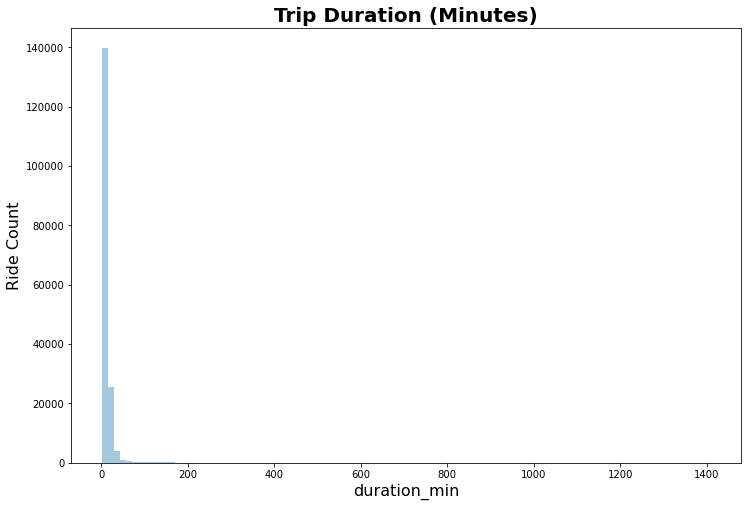

In [48]:
vis_features("Trip Duration (Minutes)", "Duration", "Ride Count")
sb.distplot(gobike_copy.duration_min, kde=False, bins=100);

In [49]:
gobike_copy.duration_min.max()

1409.1333333333334

While the maximum value is above 1.4k minutes, the bulk of the trips had durations less than 200.
.

This wide margin between the minimum and maximum duration makes it difficult to get a useful insight. 


(0.0, 200.0)

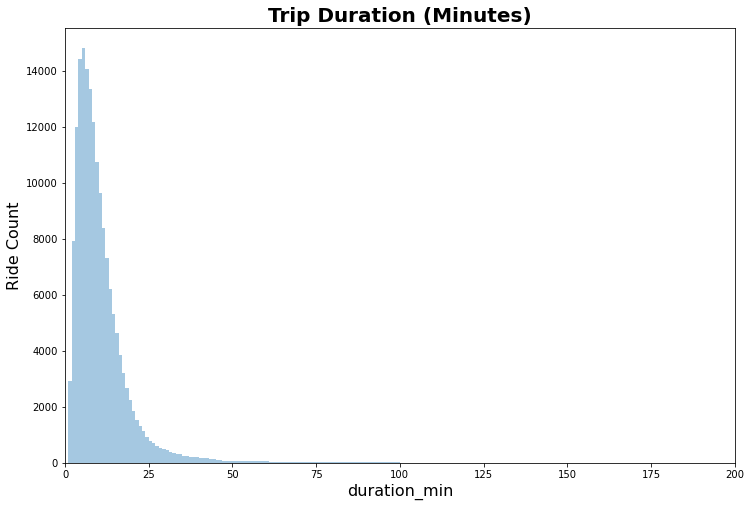

In [50]:
# I'll apply a limit for a better view.

vis_features("Trip Duration (Minutes)", "Duration", "Ride Count")
sb.distplot(gobike_copy.duration_min, kde=False, bins=range(101));
plt.xlim((0, 200))


(0.0, 50.0)

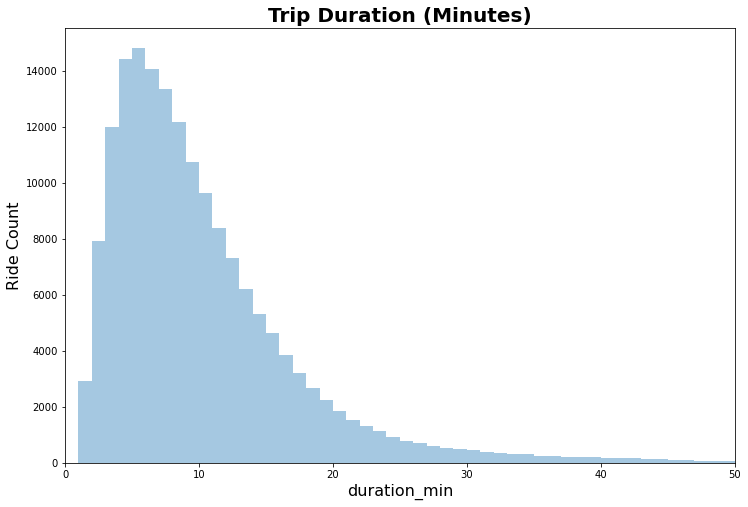

In [51]:
# I'll get it own to 50

vis_features("Trip Duration (Minutes)", "Duration", "Ride Count")
sb.distplot(gobike_copy.duration_min, kde=False, bins=range(101))
plt.xlim((0, 50))

From the plots above, a ride is more likely to last for 4 - 15 minutes
##### 2. Gender Distribution

Which gender uses the Ford GoBike service more?

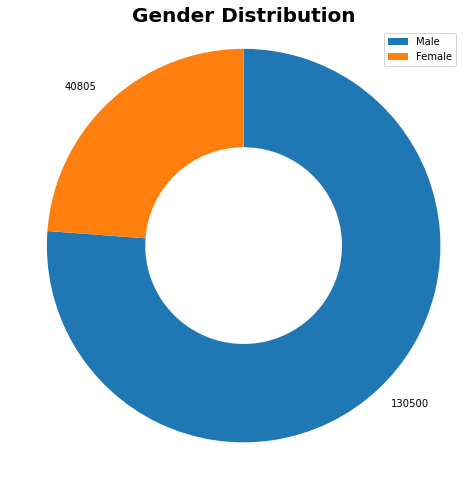

In [52]:
# Using a Donut Plot

gender_counts = gobike_copy['member_gender'].value_counts()

vis_features("Gender Distribution")
plt.pie(gender_counts, labels =  gender_counts.values, startangle = 90, 
        counterclock = False, wedgeprops = {'width' : 0.5});

plt.legend(gender_counts.index)
plt.axis('square');

Males use bikes nearly three times mre than females
.
.

##### 3. Age Distribution

Let's have a loook on the more popular age group.

Which age group has the most users?

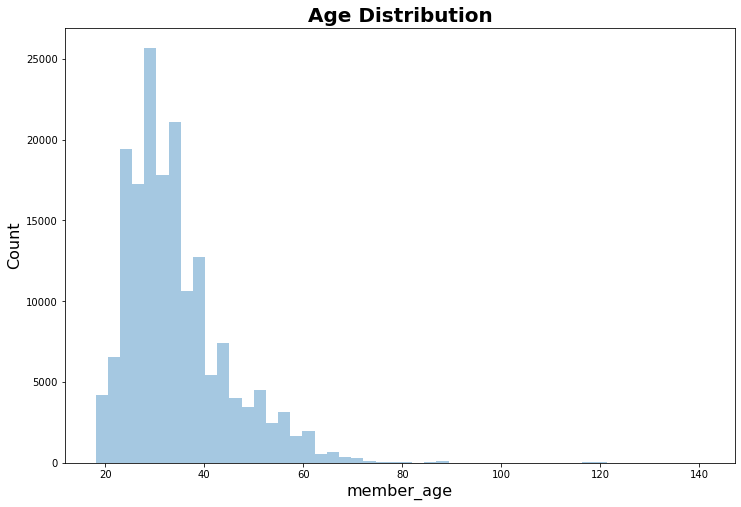

In [53]:

vis_features("Age Distribution", "Age", "Count")
sb.distplot(gobike_copy.member_age, kde=False);

The bulk of the customers are between the ages of 25 - 40 years
.
.

#### 4. User Type Distribution

How do subscribers compare with walkin customers?

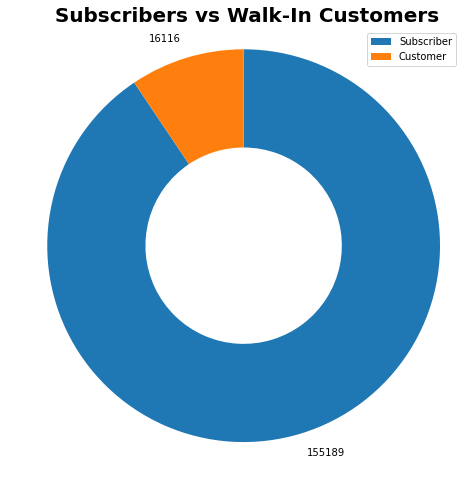

In [55]:
# Using a Donut Plot

user_counts = gobike_copy['user_type'].value_counts()

vis_features(" Subscribers vs Walk-In Customers")
plt.pie(user_counts, labels =  user_counts.values, startangle = 90, 
        counterclock = False, wedgeprops = {'width' : 0.5});

plt.legend(user_counts.index)
plt.axis('square');

Interstingly, the overwhelming majority of users are subscribers. That's great for user satisfaction.

Now let's see how the bike trip data

#### 5. Bike Trip

let's have a look at how customers complete round trips vs one way trips

Which trip type is preferred?

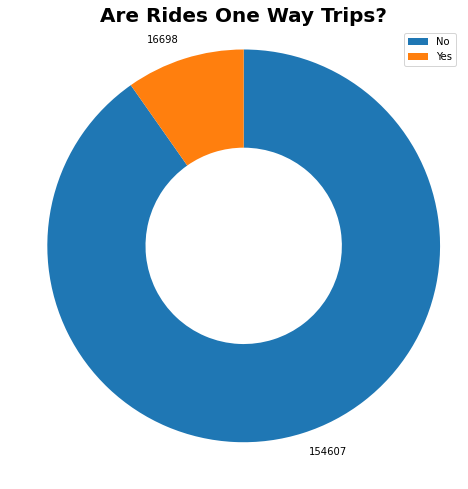

In [58]:
# Using a Donut Plot

bike_trip_counts = gobike_copy['bike_share_for_all_trip'].value_counts()

vis_features("Are Rides One Way Trips?")
plt.pie(bike_trip_counts, labels =  bike_trip_counts.values, startangle = 90, 
        counterclock = False, wedgeprops = {'width' : 0.5});

plt.legend(bike_trip_counts.index)
plt.axis('square');

Like the walkin customers, only 10% of users complete round trips. 

#### 5. Ride Traffic Hours

Let's see the hours with the most bike usage. Usint the start time data.
What time periods enjoy the most user traffic?


In [57]:
# Group each ride by the hour

per_hour_count = gobike_copy.groupby(gobike_copy.start_time.dt.hour).duration_min.count()
per_hour_count = per_hour_count.rename_axis('hour').reset_index(name='count')
AM_PM = ['00', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12AM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM']

Text(0, 0.5, 'Count')

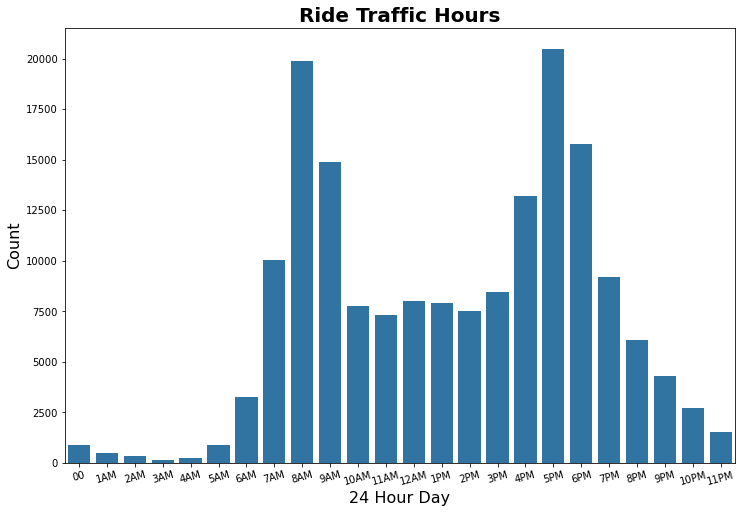

In [61]:
# Let's use a Bar Plot to show the distribution per hour

vis_features("Ride Traffic Hours")
plot = sb.barplot(data=per_hour_count, x='hour', y='count', color=color)
plot.set_xticks(ticks=per_hour_count.index, labels=AM_PM, rotation=15)
plot.set_xlabel("24 Hour Day")
plot.set_ylabel("Count")


It is unsurprising that the peak traffic hours, 8AM and 5Pm, are the natural daily rush hours.
Now, lets see the weekly traffic trend

#### 6. Weekly Traffic Trend
How many trips in a week?

In [63]:
# Group rides per week 

per_week_count = gobike_copy.groupby(gobike_copy.start_time.dt.weekday).duration_min.count()
per_week_count = per_week_count.rename_axis('weekday').reset_index(name='count')
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

Text(0, 0.5, 'Count')

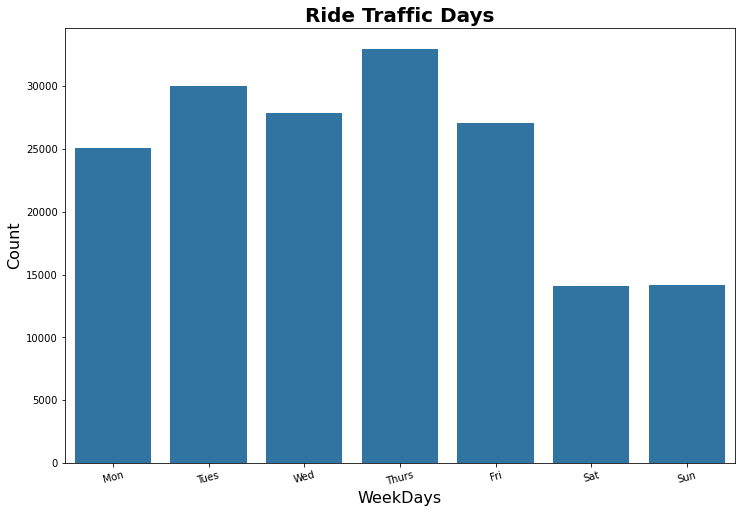

In [65]:
# Let's use a Bar Plot to show the distribution per day

vis_features("Ride Traffic Days")
plot = sb.barplot(data=per_week_count, x='weekday', y='count', color=color)
plot.set_xticks(ticks=per_week_count.index, labels=days, rotation=15)
plot.set_xlabel("WeekDays")
plot.set_ylabel("Count")


Mid-Week Days experience 30 - 50% more user traffic than weekends. This isn't suprising considering the high traffic hours are work day rush hours

### In Summary

> Only minor data cleaning was required
1. The removal of null data. Clearing these up in a couple of columns ultimately cleared up the rest. 
2. For ease of analysis it was neccessary to convert the data types of some colums to cartegorical, integers or datetime ject as required. 

>Little feaure engineering was also needed to:
- create a duration column in minutes
- create an age column from th birth years


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the 
dataset. 

Expected Exploration
1. User type Vs Trip duration
2. Age and trip duration
2. Age and User type
3. Gender Vs User type



In [66]:
gobike_copy.head(3)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,869.750000,35
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030.900000,47
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,26.416667,45


#### 1. User Type Vs Trip Duration

how long do subscribers spend on trips vs walk-ins?


(0.0, 50.0)

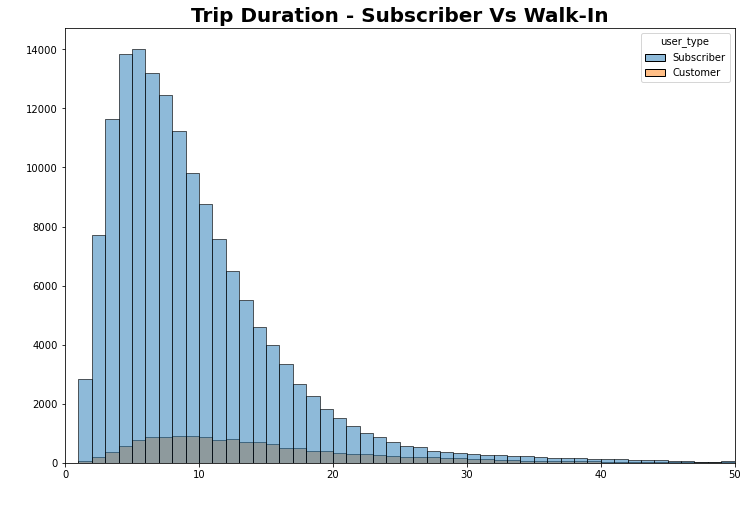

In [68]:
vis_features("Trip Duration - Subscriber Vs Walk-In")
sb.histplot(data=gobike_copy, x='duration_min', hue="user_type", bins=range(101))
plt.xlim((0, 50))

With both user types having similar peaks withing the 4 - 15 minute ride duration, the distribution is natural.

#### 2. Age Vs Trip Duration

How do the age groups compare, per trip duraton?

I'll use a Histogram here

(0.0, 50.0)

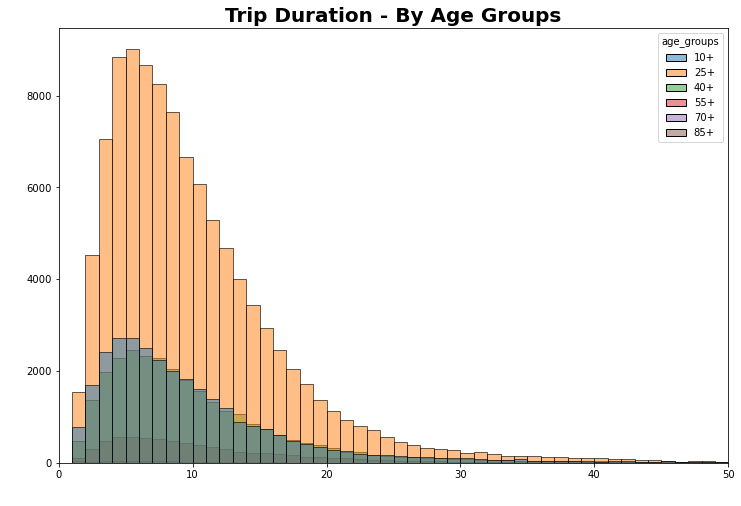

In [99]:
vis_features("Trip Duration - By Age Groups")
sb.histplot(data=gobike_copy, x='duration_min', hue="age_groups", bins=range(101))
plt.xlim((0, 50))

From the chart, users within the ages of 25-40 and 18-25 spend the most time on trips respectively.

##### 3. Age Group Vs User Type

Which user type is more likely to subscribe?

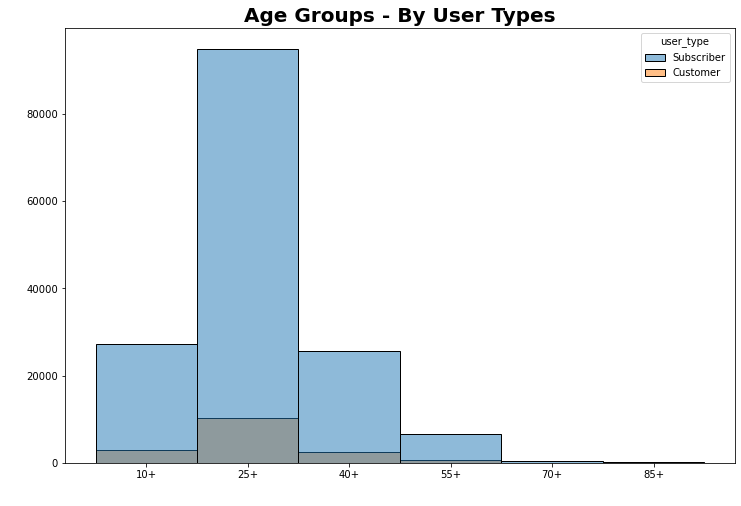

In [129]:
# Using a Histogram

vis_features("Age Groups - By User Types")
sb.histplot(data=gobike_copy, x='age_groups', hue="user_type", bins=range(101));


Nothing Unexpected here.

##### 4. Gender Vs User Type

Which gender is more likely to be a subscriber?

<AxesSubplot:title={'center':'Age Groups - By User Types'}, xlabel=' ', ylabel=' '>

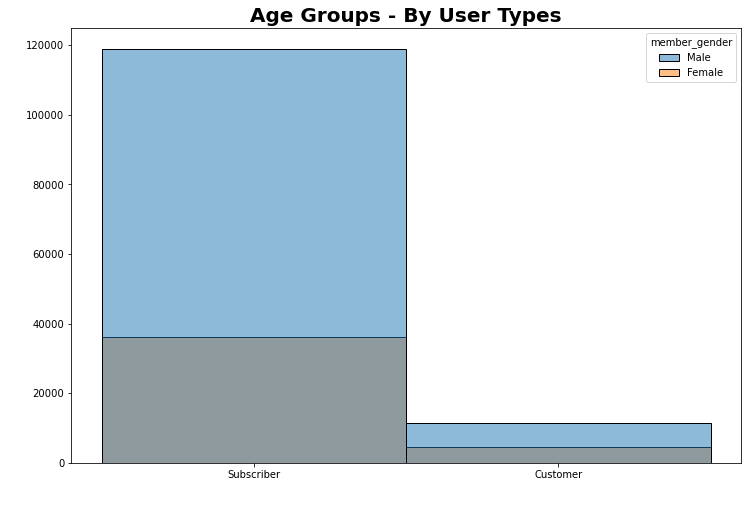

In [97]:
# Using a Histogram 

vis_features("Age Groups - By User Types")
sb.histplot(data=gobike_copy, x='user_type', hue="member_gender", bins=range(101))


### In Sumary
> This section was used to find the correlations between different varaibles in the dataset. 
So far, its safe to say traditional rush hours on week days are the high traffic times. 

# Multivariate Exploration

In this section, I will comper the relationship between two or more variables. 

1. Age Vs Gender Vs User Type
2. User Type Vs Gender Vs Day of the Week
3. User Type Vs Gender Vs Hour of the day

##### 1. Age Vs Gender Vs User Type

Does the age and gender influence chois of user type?

Text(0, 0.5, 'Age')

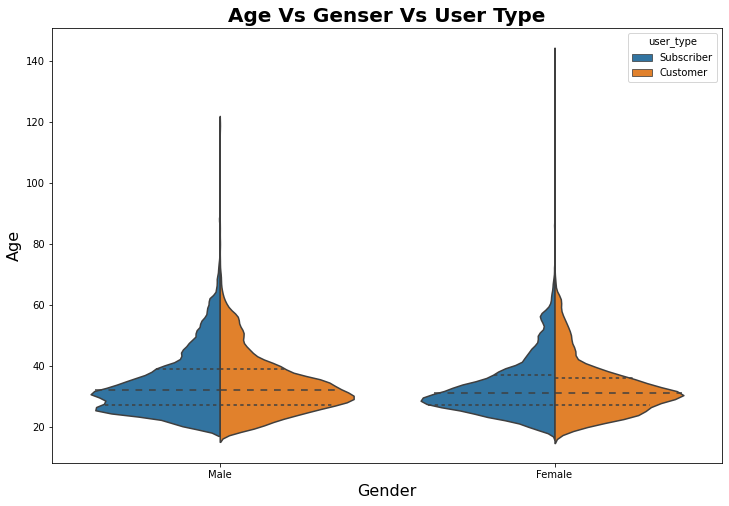

In [104]:
vis_features("Age Vs Genser Vs User Type")
plot = sb.violinplot(data=gobike_copy, x = 'member_gender', y = 'member_age', hue = "user_type", split=True, inner="quartile")
plot.set_xlabel("Gender")
plot.set_ylabel("Age")

Both Genders have identical plot patterns and interestingly, the oldest customer (140+) is a female.

##### 2.  User Type Vs Gender Vs Day Of the Week

How does the gender and user types affect Uer traffic per weekday?

In [120]:
# First, creat a data frame for all three variables

user_gender_day = gobike_copy.groupby([gobike_copy.start_time.dt.weekday, 'member_gender', 'user_type']).size().reset_index(name='count')


# For plot layout

user_gender_day = user_gender_day.pivot(index='start_time', columns=['member_gender', 'user_type'], values ='count').dropna()


Text(87.0, 0.5, 'Day of the Week')

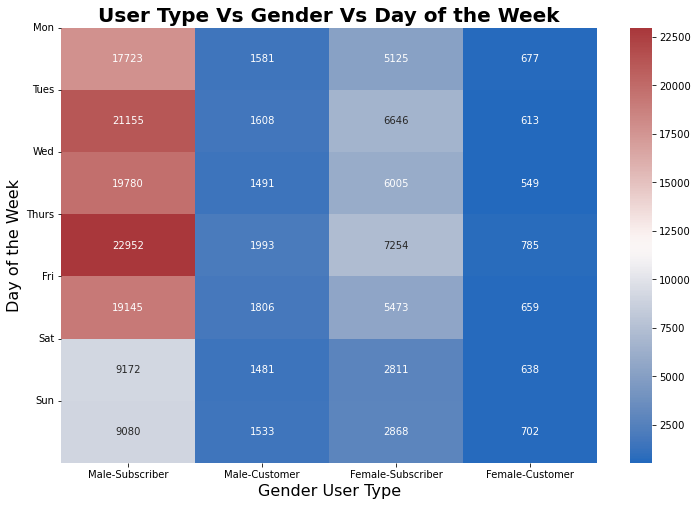

In [122]:
# The grapgh

vis_features("User Type Vs Gender Vs Day of the Week")
plot = sb.heatmap(user_gender_day, annot=True, fmt='.0f', cmap='vlag')
plot.set_yticks(ticks=per_week_count.index, labels=days, rotation=0)
plot.set_xlabel("Gender User Type")
plot.set_ylabel("Day of the Week")

This heatmap double checks the previous findings. 
- Male subscribers have the most activities in midweek.
- Thursdays and Tuesdays have the most user traffic

Now lets see the correlation of the above data with the hors in the day
##### 3. User type Vs Gender Vs Hour in the Day
How does the gender and user type affect user traffic per hour in the day?

In [125]:
# First, creat a data frame for all three variables

user_gender_hour = gobike_copy.groupby([gobike_copy.start_time.dt.hour, 'member_gender', 'user_type']).size().reset_index(name='count')


# For plot layout

user_gender_hour = user_gender_hour.pivot(index='start_time', columns=['member_gender', 'user_type'], values ='count').dropna()


Text(87.0, 0.5, 'Hour of the Day')

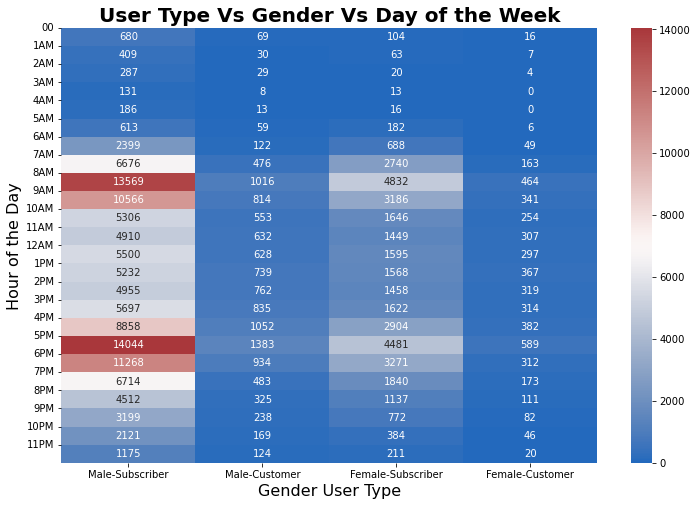

In [128]:
# The grapgh

vis_features("User Type Vs Gender Vs Hour in the Day")
plot = sb.heatmap(user_gender_hour, annot=True, fmt='.0f', cmap='vlag')
plot.set_yticks(ticks=per_hour_count.index, labels=AM_PM, rotation=0)
plot.set_xlabel("Gender User Type")
plot.set_ylabel("Hour of the Day")

The heatmap clearly shows how users request more trips in-and-around the rush hours of 8AM and 5PM. and of cours, male subscribers have more users.

#### In Summary

> The explorations in this section were mostly to confirm or dispute previous findings. 

# Conclusion 

This notebook has handled all neccessary Data analytics operations from, Data wrangling, cleaning, feature engineering, univariate, bivariate and multivariate explorations.

In [36]:
# Save Dataframe to CSV file

gobike_copy.to_csv('gobike_copy.csv')